<a href="https://colab.research.google.com/github/JoeJacob2755/AI_Project/blob/master/assignment_ml_advanced_upgrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IIT-B & UpGrad**

### Assignmnet-2


- **Pseudo Code**
- Use Linear Regression
- **Split Data**
- Clean Data
  - Missing Values
  - Redundant Values
  - Duplicate Values
  - Rename Columns
  - Remove Columns
- Outlier Handling
  - Detect Outlers
  - Remove/Replace Outliers
- Check Corelation
- **Model Creation**
  - **Step -1**
    - Use OLS
    - Use VIF and corelation
    - Remove Features
  - **Step-2**
    - Use lambda
    - Ridge regression
    - Lasso Regression
- Select Model
- Predict



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression # LinearRegresion is a class as L and R are in upper case
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

In [2]:
# This function will retun a data frame with missing values and its percentage

def missing_data(data):
    total = data.isna().sum()[data.isna().sum() != 0]
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    if [missing_df['Total'] == 0]:
        missing_df.dropna(axis=0, inplace = True)
    return missing_df
        

In [3]:
def col_unique_value_check(x,colname):
  print("Number of unique values are : ", x[colname].nunique(), '\n')
  print("Value Counts", '\n', x[colname].value_counts(),'\n')
  numbers = x[colname].isnull().sum()
  missing_percent = (x[colname].isnull().sum()/len(x[colname])*100)
  print('Number of unique of value in {} is {} & percentage is {} %'.format(colname, numbers, round(missing_percent,3)))
  return 

In [4]:
def drop_missing_value_col(x,thershold):
  drop_cols = (x.isnull().sum()/len(x))
  drop_cols = list(drop_cols[drop_cols.values >= thershold].index)
  print("No of cols to be dropped :",len(drop_cols))    
  print(drop_cols)
  x.drop(labels = drop_cols,axis =1, inplace = True)     
  print(x.shape)
  return

In [5]:
def impute_values(x):
  missing_cols = [c for c in
                  x.columns
                  if x[c].isnull().sum()>0]
  int_col = [i for i in missing_cols
             if x[i].dtype == 'float64']
  str_col = [i for i in missing_cols
             if x[i].dtype == 'object' ]   
     # x[c] = x[c].fillna[x[c].median(), inplace = True]
  print(int_col)
  print(str_col)
  for c in x.columns:
    if x[c].isnull().sum()>0:
      if x[c].dtype == 'float64':
        x[c].fillna(x[c].median(), inplace=True)
      elif x[c].dtype == 'int':
        x[c].fillna(x[c].median(), inplace=True)
      elif x[c].dtype == 'object':
        x[c].fillna(x[c].mode()[0], inplace=True)


In [6]:
# load data
house_raw = pd.read_csv('https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv')
house_raw.shape

(1460, 81)

### Split the data into train and test set


In [7]:
# split data
h_train, h_test = train_test_split(house_raw,test_size=0.3, random_state = 2)

In [8]:
print('train data shape: ', h_train.shape)
print('test data shape : ', h_test.shape)

train data shape:  (1022, 81)
test data shape :  (438, 81)


In [9]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 104 to 1192
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1022 non-null   int64  
 1   MSSubClass     1022 non-null   int64  
 2   MSZoning       1022 non-null   object 
 3   LotFrontage    847 non-null    float64
 4   LotArea        1022 non-null   int64  
 5   Street         1022 non-null   object 
 6   Alley          68 non-null     object 
 7   LotShape       1022 non-null   object 
 8   LandContour    1022 non-null   object 
 9   Utilities      1022 non-null   object 
 10  LotConfig      1022 non-null   object 
 11  LandSlope      1022 non-null   object 
 12  Neighborhood   1022 non-null   object 
 13  Condition1     1022 non-null   object 
 14  Condition2     1022 non-null   object 
 15  BldgType       1022 non-null   object 
 16  HouseStyle     1022 non-null   object 
 17  OverallQual    1022 non-null   int64  
 18  Overal

In [10]:
# Find missing Data
missing_data(h_train)

,Total,Percent
LotFrontage,175.0,17.123288
Alley,954.0,93.346380
MasVnrType,6.0,0.587084
MasVnrArea,6.0,0.587084
BsmtQual,26.0,2.544031
BsmtCond,26.0,2.544031
BsmtExposure,27.0,2.641879
BsmtFinType1,26.0,2.544031
BsmtFinType2,26.0,2.544031
Electrical,1.0,0.097847


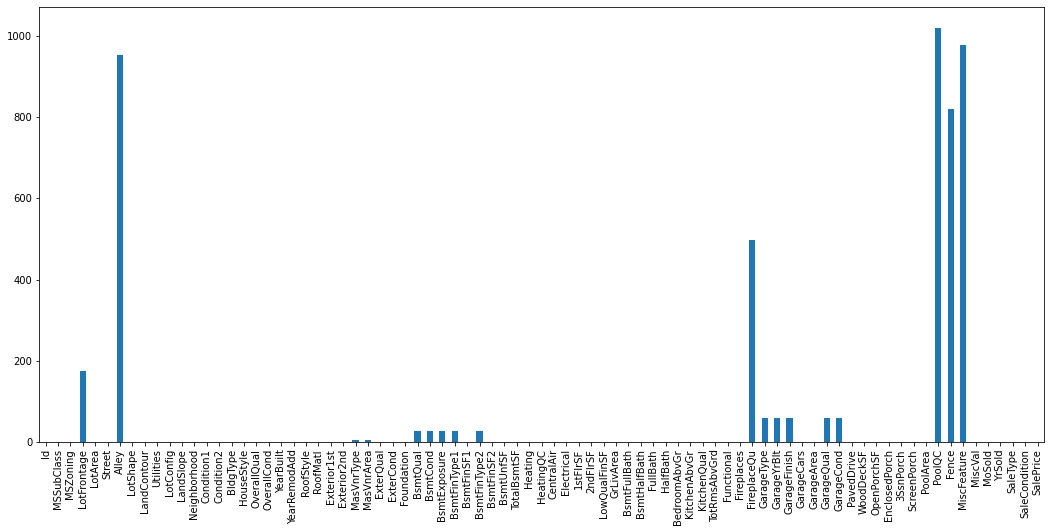

In [11]:
# visualize missing data
plt.figure(figsize=(18,8))
h_train.isna().sum().plot.bar()
plt.show()

In [12]:
drop_missing_value_col(h_train,.3)

No of cols to be dropped : 5
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
(1022, 76)


In [13]:
missing_data(h_train)

,Total,Percent
LotFrontage,175.0,17.123288
MasVnrType,6.0,0.587084
MasVnrArea,6.0,0.587084
BsmtQual,26.0,2.544031
BsmtCond,26.0,2.544031
BsmtExposure,27.0,2.641879
BsmtFinType1,26.0,2.544031
BsmtFinType2,26.0,2.544031
Electrical,1.0,0.097847
GarageType,58.0,5.675147


In [14]:
impute_values(h_train)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [15]:
missing_data(h_train)

,Total,Percent


In [16]:
# Unique Values
h_train.nunique().sort_values()

Utilities          2
CentralAir         2
Street             2
BsmtHalfBath       3
GarageFinish       3
                ... 
1stFlrSF         611
BsmtUnfSF        627
GrLivArea        671
LotArea          782
Id              1022
Length: 76, dtype: int64

In [17]:
# duplicate values
duplicates = h_train[h_train.duplicated()]
duplicates.shape

(0, 76)

In [18]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 104 to 1192
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1022 non-null   int64  
 1   MSSubClass     1022 non-null   int64  
 2   MSZoning       1022 non-null   object 
 3   LotFrontage    1022 non-null   float64
 4   LotArea        1022 non-null   int64  
 5   Street         1022 non-null   object 
 6   LotShape       1022 non-null   object 
 7   LandContour    1022 non-null   object 
 8   Utilities      1022 non-null   object 
 9   LotConfig      1022 non-null   object 
 10  LandSlope      1022 non-null   object 
 11  Neighborhood   1022 non-null   object 
 12  Condition1     1022 non-null   object 
 13  Condition2     1022 non-null   object 
 14  BldgType       1022 non-null   object 
 15  HouseStyle     1022 non-null   object 
 16  OverallQual    1022 non-null   int64  
 17  OverallCond    1022 non-null   int64  
 18  YearBu

In [19]:
h_train['MSSubClass'] = h_train['MSSubClass'].astype('str')

In [20]:
# Outliers
h_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Id,1022.0,726.191781,420.711238,1.0,360.25,733.0,1078.75,1460.0
LotFrontage,1022.0,69.855186,21.960845,21.0,60.00,69.0,79.00,313.0
LotArea,1022.0,10385.796477,10132.415158,1477.0,7452.50,9375.0,11441.00,215245.0
OverallQual,1022.0,6.051859,1.380660,1.0,5.00,6.0,7.00,10.0
OverallCond,1022.0,5.583170,1.128576,1.0,5.00,5.0,6.00,9.0
YearBuilt,1022.0,1970.369863,30.483923,1872.0,1953.00,1971.5,2000.00,2010.0
YearRemodAdd,1022.0,1984.508806,20.723057,1950.0,1966.00,1993.0,2003.75,2010.0
MasVnrArea,1022.0,98.387476,174.897559,0.0,0.00,0.0,158.00,1600.0
BsmtFinSF1,1022.0,439.917808,434.571572,0.0,0.00,383.5,711.00,2188.0
BsmtFinSF2,1022.0,45.898239,162.555382,0.0,0.00,0.0,0.00,1474.0


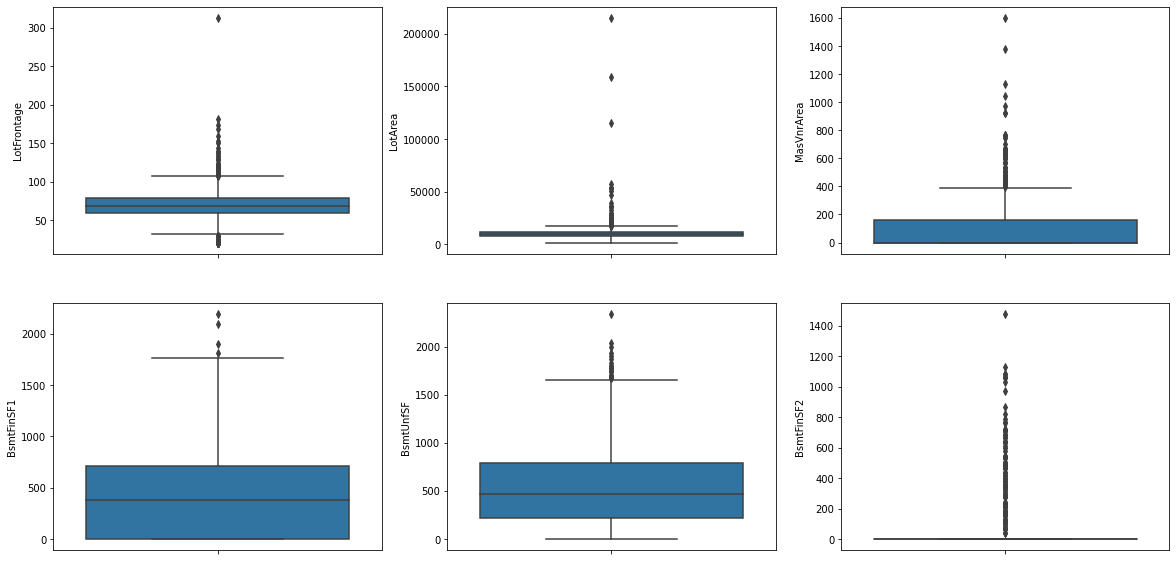

In [21]:
f, ax = plt.subplots(2,3, figsize=(20,10))

sns.boxplot(y="LotFrontage", data=h_train, ax = ax[0,0])
sns.boxplot(y="LotArea", data=h_train, ax = ax[0,1])
sns.boxplot(y="MasVnrArea", data=h_train, ax = ax[0,2])
sns.boxplot(y="BsmtFinSF1", data=h_train, ax = ax[1,0])
sns.boxplot(y="BsmtUnfSF", data=h_train, ax = ax[1,1])
sns.boxplot(y="BsmtFinSF2", data=h_train, ax = ax[1,2])

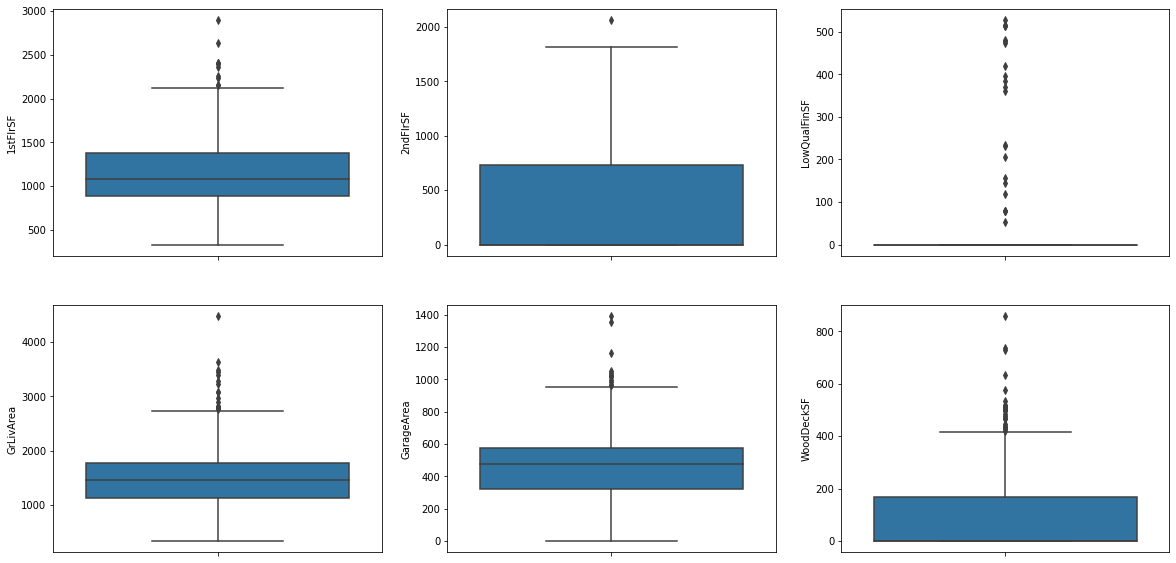

In [22]:
f, ax = plt.subplots(2,3, figsize=(20,10))

sns.boxplot(y="1stFlrSF", data=h_train, ax = ax[0,0])
sns.boxplot(y="2ndFlrSF", data=h_train, ax = ax[0,1])
sns.boxplot(y="LowQualFinSF", data=h_train, ax = ax[0,2])
sns.boxplot(y="GrLivArea", data=h_train, ax = ax[1,0])
sns.boxplot(y="GarageArea", data=h_train, ax = ax[1,1])
sns.boxplot(y="WoodDeckSF", data=h_train, ax = ax[1,2])

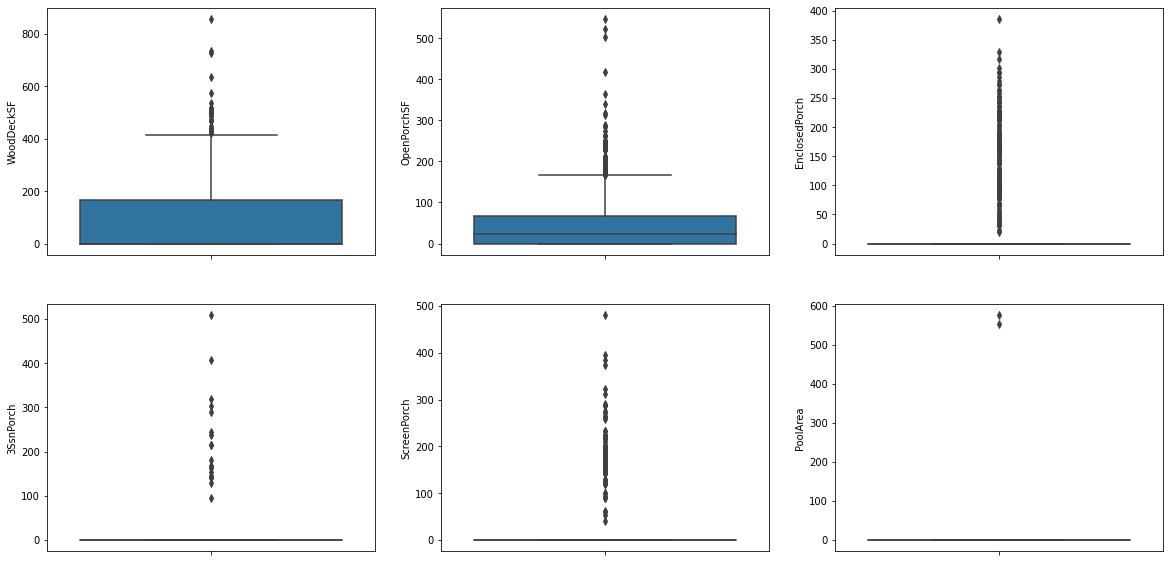

In [23]:
f, ax = plt.subplots(2,3, figsize=(20,10))

sns.boxplot(y="WoodDeckSF", data=h_train, ax = ax[0,0])
sns.boxplot(y="OpenPorchSF", data=h_train, ax = ax[0,1])
sns.boxplot(y="EnclosedPorch", data=h_train, ax = ax[0,2])
sns.boxplot(y="3SsnPorch", data=h_train, ax = ax[1,0])
sns.boxplot(y="ScreenPorch", data=h_train, ax = ax[1,1])
sns.boxplot(y="PoolArea", data=h_train, ax = ax[1,2])

In [24]:
h_train['3SsnPorch'].value_counts()
# Delete the column

0      1003
144       2
168       2
216       2
407       1
320       1
162       1
182       1
290       1
96        1
304       1
153       1
245       1
238       1
508       1
130       1
140       1
Name: 3SsnPorch, dtype: int64

In [25]:
h_train['PoolArea'].value_counts()

0      1020
576       1
555       1
Name: PoolArea, dtype: int64

In [26]:
h_train['BsmtFinSF2'].nunique()

101

In [27]:
h_train['LowQualFinSF'].value_counts()

0      1000
80        3
397       1
205       1
515       1
473       1
144       1
53        1
513       1
528       1
514       1
120       1
384       1
371       1
234       1
481       1
232       1
156       1
420       1
479       1
360       1
Name: LowQualFinSF, dtype: int64

In [28]:
h_train['WoodDeckSF'].value_counts()

0      542
192     23
100     22
120     22
168     19
      ... 
195      1
392      1
361      1
110      1
126      1
Name: WoodDeckSF, Length: 229, dtype: int64

In [29]:
h_train['EnclosedPorch'].value_counts()

0      878
112      9
96       5
216      4
252      3
      ... 
81       1
176      1
143      1
30       1
20       1
Name: EnclosedPorch, Length: 100, dtype: int64

In [30]:
h_train['ScreenPorch'].value_counts()

0      941
192      6
224      3
120      3
126      3
160      3
168      3
189      2
144      2
90       2
176      2
184      2
100      2
180      2
147      2
216      2
60       1
198      1
234      1
53       1
200      1
165      1
142      1
266      1
152      1
225      1
190      1
156      1
130      1
210      1
220      1
287      1
197      1
185      1
40       1
259      1
154      1
312      1
271      1
288      1
145      1
95       1
276      1
153      1
385      1
480      1
204      1
170      1
233      1
396      1
322      1
119      1
155      1
291      1
63       1
178      1
263      1
374      1
Name: ScreenPorch, dtype: int64

In [31]:
h_train['BsmtFinSF2'].nunique()

101

In [32]:
# remomve outliers from 95 to 100%. This value is taken so as to delete very high values.
lot_frontage_q = h_train["LotFrontage"].quantile(0.95)
h_train = h_train[h_train["LotFrontage"] < lot_frontage_q]

open_porch_sf_q = h_train["OpenPorchSF"].quantile(0.95)
h_train = h_train[h_train["OpenPorchSF"] < open_porch_sf_q]

gr_liv_area_q = h_train["GrLivArea"].quantile(0.95)
h_train = h_train[h_train["GrLivArea"] < gr_liv_area_q]

garage_area_q = h_train["GarageArea"].quantile(0.95)
h_train = h_train[h_train["GarageArea"] < garage_area_q]

bsmt_fin_sf2_q = h_train["BsmtFinSF2"].quantile(0.95)
h_train = h_train[h_train["BsmtFinSF2"] < bsmt_fin_sf2_q]

In [33]:
h_train=h_train.drop(['PoolArea','Id','3SsnPorch','LowQualFinSF'], axis=1)

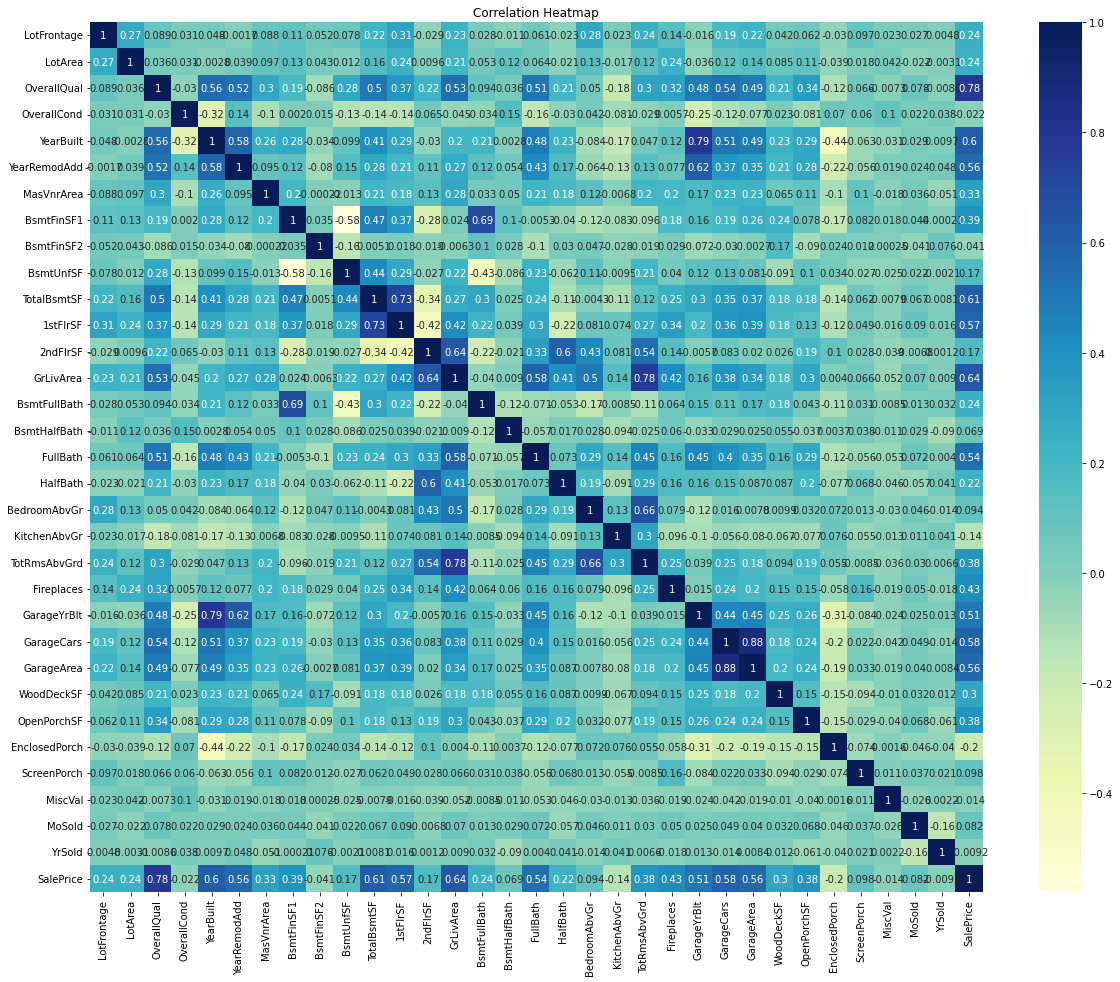

In [34]:
#Correlation
plt.figure(figsize=(20,16))
price_corr = h_train.corr()
sns.heatmap(price_corr,annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
h_train['YearBuilt']

104     1931
1185    1924
786     1915
379     2000
1129    1980
        ... 
360     1978
1099    1978
466     1970
299     1950
1192    1925
Name: YearBuilt, Length: 786, dtype: int64

In [36]:
from datetime import datetime

## Basic EDA

In [37]:
h_train.shape

(786, 72)

In [38]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 104 to 1192
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     786 non-null    object 
 1   MSZoning       786 non-null    object 
 2   LotFrontage    786 non-null    float64
 3   LotArea        786 non-null    int64  
 4   Street         786 non-null    object 
 5   LotShape       786 non-null    object 
 6   LandContour    786 non-null    object 
 7   Utilities      786 non-null    object 
 8   LotConfig      786 non-null    object 
 9   LandSlope      786 non-null    object 
 10  Neighborhood   786 non-null    object 
 11  Condition1     786 non-null    object 
 12  Condition2     786 non-null    object 
 13  BldgType       786 non-null    object 
 14  HouseStyle     786 non-null    object 
 15  OverallQual    786 non-null    int64  
 16  OverallCond    786 non-null    int64  
 17  YearBuilt      786 non-null    int64  
 18  YearRem

#### Univariate Analysis

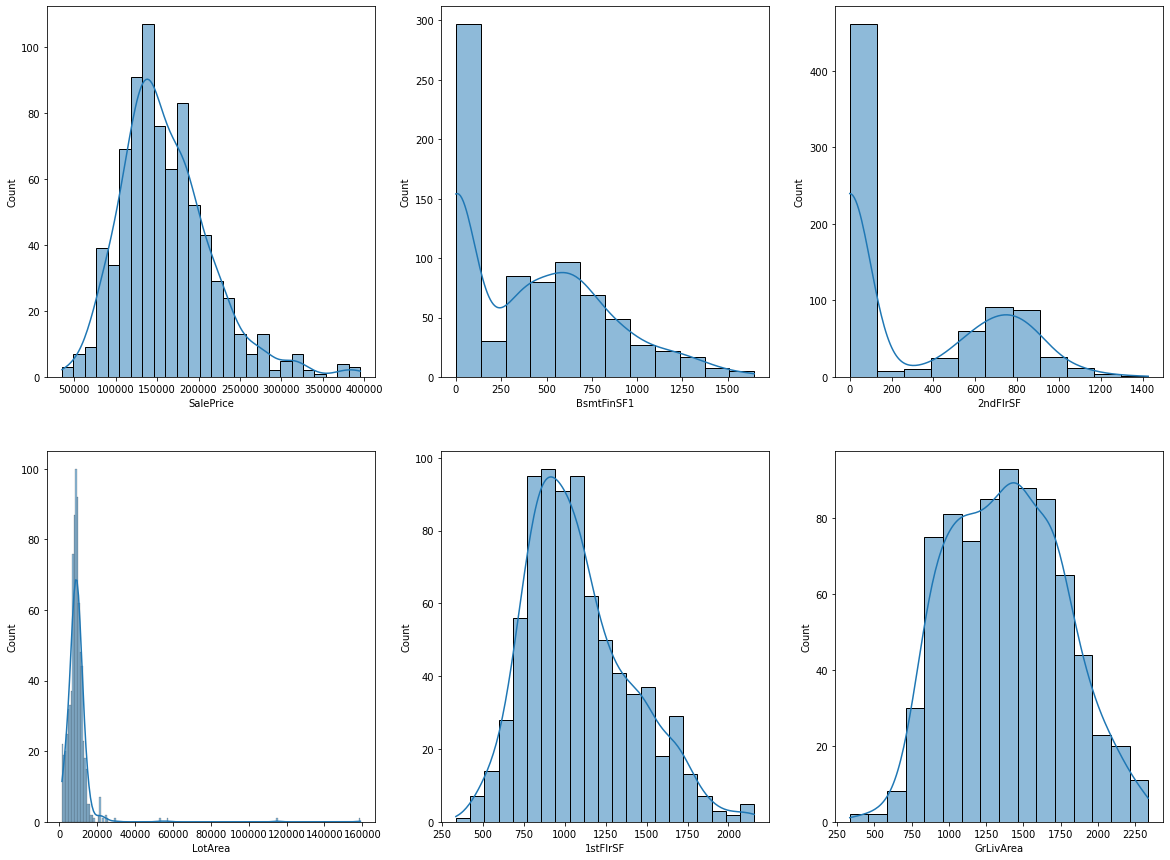

In [39]:
f, ax = plt.subplots(2,3, figsize=(20,15))

sns.histplot(data=h_train, x="SalePrice", palette ='rainbow', kde=True, ax=ax[0,0])
sns.histplot(data=h_train, x="LotArea", palette ='rainbow', kde=True, ax=ax[1,0])
sns.histplot(data=h_train, x="BsmtFinSF1", palette ='rainbow', kde=True, ax=ax[0,1])
sns.histplot(data=h_train, x="1stFlrSF", palette ='rainbow', kde=True, ax=ax[1,1])
sns.histplot(data=h_train, x="2ndFlrSF", palette ='rainbow', kde=True, ax=ax[0,2])
sns.histplot(data=h_train, x="GrLivArea", palette ='rainbow', kde=True, ax=ax[1,2])

#### Bivariate Analysis

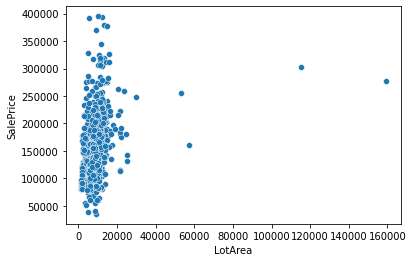

In [40]:
sns.scatterplot(x='LotArea', y='SalePrice', data=h_train)

### Model Creation

In [41]:
# Create X and y
y_train = h_train.pop('SalePrice') # Create a series for y_train
X_train_1 = h_train # pop will remove 'total_user' inplace from df_train and leave us with X_train
print('Shape of y_train :',y_train.shape)
print('Shape of X_train :',X_train_1.shape)
X_train_1.head(2)

Shape of y_train : (786,)
Shape of X_train : (786, 71)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition
104,50,RM,69.0,7758,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,Y,0,0,0,184,0,6,2007,WD,Normal
1185,50,RL,60.0,9738,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,0,236,0,0,3,2006,WD,Normal
